## Makine Öğrenmesi Projesi Bölüm-1

Bu çalışmamızda gerçek veriseti kulanarak bir makine öğrenmesi çalışmasının tüm adımlarını uygulamalı olarak göreceğiz.

Bizden istenen durum:

 > Bir binanın "Energy Star puanını" tahmin edebilen bir model geliştirmek için eldeki bina enerji verilerini kullanın ve sonuçları enerji puanını en iyi tahmin eden değişkenleri bulmak için yorumlayın.

Bu işlem anlaşıldığı üzere bir yapılandırılmış(supervised), regresyon makine öğrenmesi görevidir. Çünkü, bir veri seti verilmiş ve hedeflenen durum(yani maksimum puan) belirtilmiş, burada yapmak istediğimiz belirtilen özellikleri istenen hedef ile eşleştirebilen(karşılaştırabilen) bir model geliştirmek istiyoruz.

Yapılandırılmış Problem(Supervised Problem) : Açıkça anlaşıldığı üzere problemimiz yapılandırılmış çünkü özellik ve hedef her ikiside verilmiş.
Regresyon Problemi(Resgression Problem) : Hedef değişkenler sürekli ve 0-100 arasında değer alıyor.

Eğitim sürecinde modelimizin özellikler ve enerji puanı arasındaki ilişkiyi öğrenmesini istiyoruz. Hem özellikleri hem de cevabı vererek eğitim sırasında, modelin özellikler ve puan arasındaki ilişkiyi öğrenmesini bekliyoruz. Ondan sonra modelimizi daha önce hiç bilinmeyen veriler ile test edip, modelin ne kadar iyi eğitildiğini kontrol ediyoruz.

Makine Öğrenmesi Adımları.

Aslında ne kadarda vereceğimiz işlem adımları değişkenlik gösterebilse de ana iskelet olarak  bir makine öğrenmesi çalışması aşağıda belirtilen adımlardan oluşmaktadır:

    1. Veri Temizleme ve biçimlendirme(Data cleaning and formatting)
    2. Açılayıcı veri analizi(Exploratory data analysis)
    3. Özellik belirleme ve seçme(Feature engineering and selection)
    4. Temel işlemleri uygulayıp birkaç farklı makine öğrenmesi modeli ile deneyerek performanslarını  karşılaştırma
    (Establish a baseline and compare several machine learning models on a performance metric)
    5. Problem için optimize etmek üzere en iyi modele hiperparametre ayarlaması yapma!
       (Perform hyperparameter tuning on the best model to optimize it for the problem)
    6. Test verileri üzerinde en iyi modeli değerlendirme. (Evaluate the best model on the testing set)
    7. Model sonuçlarını en iyi şekilde yorumlama. (Interpret the model results to the extent possible)
    8. Sonuçları görselleştirme ve raporumuzu eniyi şekilde hazırlama.
       (Draw conclusions and write a well-documented report)
    
Yukarıda belirttiğimiz işlem adımlarının birbirini nasıl takip ettiğini anlamaya çalışalım. Daha öncede belirttiğimiz üzere makine öğrenmesi işlem adımları burada belirtilen kuralların katı bir şekilde uygulanacağı anlamına gelmiyor. Örnek olarak, herhangi bir model oluşturmadan önce bir özellik belirleme işlemini deneyimleyebiliriz yada geri dönmek ve farklı bir özellik grubu seçmek için modelleme sonuçlarını kullanabiliriz veya bizim oluşturduğumuz model çok aykırı sonuçlarda üretebilir bunun için verilerin anlaşılmasını başka bir açıdan da anlamaya çalışabiliriz.

Genellikle olan şudur, bir adımı tamamlayıp diğerine geçmek ve sonuçları gözlemlemektir. Şöyle düşünmeyin biz bir işlemi yaptık bitti ve diğer adıma geçtik artık bir daha geri dönemeyiz.

Bu çalışmamız yukarıda belirtmiş olduğumuz işlem adımlarının ilk üç adımını kapsayacak, diğer adımlar için serinin devamı olan yeni çalışma örneklerinde ilgili konulara değineceğiz. Çalışma örneğimizde daha çok işlemlerin uygulanma şekline değineceğiz konular ile ilişkili derin bilgiler almak isterseniz sayfa sonunda belirteceğim linklerden ilgili konular için detaylı bilgi edinebilirsiniz.

Evet, çalışmamıza artık başlayabiliriz, çok fazla laf kalabalığı yapmak benimde hoşuma gitmiyor. 
E o zaman hadi bize lazım olacak ve çalışmamızda kullanacağımız python kütüphanelerini eklemekle projemize başlayalım.
Bu çalışmamızda standart veri bilimi kütüphaneleri olan: numpy, pandas ve scikit-learn kullanacağız, yaptığımız çalışmaları görselleştirmek içinde matplotlib ve seaborn kütüphanelerinden faydalanacağız.

E hadi başlayalım :)

In [1]:
#Verileri işlemek için Pandas ve numpy kütüphanelerini ekliyoruz.
import pandas as pd
import numpy as np

#Bölüm kopyaları üzerinde değer ayarlamaya ilişkin uyarıları kapatmak için 
pd.options.mode.chained_assignment = None

#60 sütüna kadar verilerimizi görüntülüyoruz
pd.set_option('display.max_columns', 60)

#Görselleştirme arası olan Matplotlib ekliyoruz
import matplotlib.pyplot as plt
%matplotlib inline

#Yazı fontlarını varsayılan olarak ayarlıyoruz
plt.rcParams['font.size'] = 24

#Şekil boyutlarını ayarlamak için dahili Ipython kütüphanesinide ekliyoruz
from IPython.core.pylabtools import figsize

#Yine görselleştirme aracı olarak seaborn kütüphanesini ekliyoruz.
import seaborn as sns
sns.set(font_scale = 2)

#Verilerimize eğitim ve test verileri olarak bölüyoruz, genel kabul olarak (%80 eğitim, %20 test)
from sklearn.model_selection import train_test_split

   ### 1. Verilerin temizlenmesi ve düzenlenmesi
   ####     Verileri yükleme ve inceleme
       
  Veri bilimi için en iyi veri yapılarından biri  olarak kullanılan pandas kütüphansesini kullanarak verilerimizi çalışma ortamına yüklüyoruz. Pandas kütüphanesini Python'un bir sayfası olarak düşünebilirsiniz, bu sayfada temizleme, düzenleme ve görselleştirme işlemlerini yapacağız, yani bu sayfayı bayağı karalayacağız. Pandas'ta birçok method var bunlar bilimsel çalışmalar için ihtiyaç olan kütüphanelerdir ve amacına uygun olarak bu kütüphaneler kullanılabilir.

Veri setini [linkteki](http://www.nyc.gov/html/gbee/html/plan/ll84_comply.shtml#2) web sitesinden aldık.

In [2]:
#Verilerimizi ilgili dataframe(veri çerçevesi)'nden okuyoruz
data = pd.read_csv('../saitalay/Projeler/VeriBilimi/Kaggle/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
#Şimdi veri çerçevemizi görüntüleyelim- özet olarak ilk 5 satır görüntüleniyor(Python için böyle, R'da farklı)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Evet eldeki verilere ilişkin yukarıdaki çıktıda birtakım değerler görünüyor ancak hepsinin ne anlama geldiğini bilmiyoruz. Veri seti içerisinde 60 sütün var ve bu sütünların ne demek olduğunu biz bilmiyoruz. Tek bildiğimiz şey bize problemde verilen ve bizden istenen puan(ENERGY STAR Score) sütünu, çünkü bizden enerji puanı için hangi özelliğin  en önemli olduğunu bulmamız istenmişti. Bu veri seti içerisinde bulunan her sütunun ne anlama geldiğini bilmemiz gerekmiyor, bizim için önemli olan hangi özelliğin enerji puanı için en önemli olduğunu bulmak. Makine öğrenmesi içinde problem teşkil etmiyor çünkü modelin hangi özelliklerin önemli olduğuna karar vermesini biz belirliyoruz. Hatta bazen sütun isimlerinide vermeyebiliriz yada ne tahmin etmeye çalıştığımız şeyleri söylemeyiz. Yine de, problemi mümkün olduğunca anlamak istiyoruz ve model sonuçlarını da yorumlamak istediğimizden, sütunlarla ilgili bazı bilgilere sahip olmak iyi bir fikir olabilir.(ne diyoruz; bilgi faydalıdır.) 

Tabi veri seti içerisinde bize faydalı olacak bilgiler(sütunlar), üzerinde yoğunlaşmak daha iyi olacaktır. Çünkü biz birşeyler tahmin etmek istiyoruz bunun için hedeflenen veriler üzerinde çalışacağız.(Burada hedeflenen veri Enerji Yıldız Puanı)

Şimdi bizden istenen hedef neydi tekrar hatırlayalım,

Ilgili raporlama yılı için kendinden bildirilen enerji kullanımına dayalı olarak Portföy Yöneticisi'nde hesaplanan ve  belirtilen bina türleri için 1-100 değerlerinde yüzdelik sıralamasının yapılması işlemi.

Bu oldukça basit : Enerji Yıldızı Puanı(EYP), enerji verimliliği açısından binaları  en kötü olanın 1 ve en iyi olanı ise 100 ile derecelendirme yöntemidir. Göreceli bir yüzdelik sıralamasıdır. Bu, binaların birbirlerine göre puanlandırıldığı ve değerler aralığında düzgün bir dağılım göstermesi gerektiği anlamına gelir.

### Veri Tipleri ve  Kayıp Değerler

Dataframe.info yöntemi, her bir sütunun veri türlerini ve eksik olmayan değerlerin sayısını görüntüleyerek verileri hızlı bir şekilde değerlendirmenin yoludur. Veri içeriğine neden bakmalıyız, çünkü veriler içerisinde bir problem olabilir örneğin eksik değerler olabilir, bunun için np.nan(bir sayı değil) yerine "Mevcut değil" olarak  ilgili hücreler değiştirilir. Bu, sayıları olan sütunların bile object olarak gösterilmesi anlamına gelir çünkü Pandas, herhangi bir dizgisi olan sütunları tüm dizelerin sütunlarına dönüştürür.

In [3]:
#Sütünların veri tiplerini ve eksik olmayan değerleri görüntülüyoruz.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

Yukarıdaki çıktıda görüldüğü üzere, nesne veri türü olarak kaydedilmiş değerler içeren çokça sütun var. Herhangi bir sayısal analiz yapmadan önce bunları float veri türüne dönüştürmemiz gerekiyor. Çünkü pandas sayısal veriler üzerinde işlemler yapmaktadır.

### Verileri doğru veri türlerine dönüştürme
Sütunları sayısal veri türlerine dönüştürüp "Kullanılamıyor(nan)" girişlerini np.nan ile değiştirerek float olarak yorumlatabiliriz. Daha sonra tam sayı değerler içeren (kareler veya enerji kullanımı gibi) sütunları sayısal(float) veri türlerine dönüştüreceğiz.

Burada np.nan, sayı olarak yorumlanamayan bir sayı ile tüm “Kullanılamıyor” girişlerinin yerini alan ve ilgili sütunları float veri türüne dönüştüren küçük bir Python kodu yazıyoruz. Daha sonra tam sayı değerler içeren (kareler veya enerji kullanımı gibi) sütunları sayısal(float) veri türlerine dönüştüreceğiz.

In [4]:
# Veri seti içerisindeki kullanılamıyor olan tüm değerleri numpy ile nan olarak değiştiriyoruz
data = data.replace({'Not Available': np.nan})

# Tüm sütunlar boyunca uyguluyoruz
for col in list(data.columns):
    # Sayısal(float- kayan noktalı) olmasını istediğimiz sütunları seçiyoruz
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Verileri Float olarak dönüştürüyoruz
        data[col] = data[col].astype(float)

In [5]:
# herbir sütunun istatistiksel olarak görüntülenmesi
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

### Eksik Değerler
Artık doğru veri türlerine sahip olduğumuza göre, her bir sütunda eksik değerlerin yüzdesine bakarak analiz başlatabiliriz. Keşfedici Veri Analizi(Exploratory Data Analysis) yaptığımızda eksik değerler iyidir, ancak makine öğrenimi yöntemleri için eksik değerlerin doldurulmaları gerekir.

Aşağıdaki kod, eksik değerlerin sayısını ve her sütun için eksik olan toplam değerlerin yüzdesini hesaplayan bir fonksiyondur(işlev). Veri bilimindeki birçok görevde olduğu gibi, bu fonksiyonu kendim yazmamıştım, bu fonksiyonu da bir Stack Overflow forumundan buldum!

In [6]:
#Sütunlardaki eksik olan değerleri hesaplıyoruz
def missing_values_table(df):
    #Toplam  eksik değer sayısı
    mis_val = df.isnull().sum()
    
    #eksik değerlerin yüzde olarak hesaplanması
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    #sonuçları bir tablo haline dönüştürüyoruz
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    #Sütunları Yeniden isimlendiriyoruz
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '%of Total Values'})
    
    #Tabloyu eksik değerlerin azalan sırasına göre sıralama
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
        '%of Total Values', ascending=False).round(1)
    #Bazı özet bilgileri yazdıralım
    print ("Bizim seçtiğimiz veri çerçevesinde olan sütun sayısı : " + str(df.shape[1]) + "\n"      
            "Ve burada eksik veriler içeren sütun sayısı : " + str(mis_val_table_ren_columns.shape[0]))
    
    # Eksik veriler içeren veri çerçevesine dallan
    return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Bizim seçtiğimiz veri çerçevesinde olan sütun sayısı : 60
Ve burada eksik veriler içeren sütun sayısı : 46


,Missing Values,%of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


Her ne kadar bilgi atmamak ve sütunları ayıklarken dikkatli olmak istiyorsak da, eğer bir sütun çok fazla eksik değere sahipse, o zaman ilgili sütunlar muhtemelen çok fazla kullanılmayacaktır.

Hangi sütunların saklanması biraz keyfi olabilir, ancak bu proje için %50'den fazla eksik değer içeren sütunları çıkaracağız. Genel olarak, herhangi bir bilgiyi atma konusunda dikkatli olun, çünkü tüm gözlemler için olmasa bile, hedef değeri tahmin etmek için hala bazı bilgiler yararlı olabilir.

In [8]:
# %50'den  fazla eksik değer içeren sütunları seçiyoruz
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['%of Total Values'] > 50].index)

print('Bizim silmemiz gereken %d sütun.' % len(missing_columns))

Bizim seçtiğimiz veri çerçevesinde olan sütun sayısı : 60
Ve burada eksik veriler içeren sütun sayısı : 46
Bizim silmemiz gereken 11 sütun.


In [9]:
# Sütunları siliyoruz
data = data.drop(columns = list(missing_columns))

### Keşifsel Veri Analizi(Exploratory Data Analysis)
Keşifsel veri analizi: Verilerin anlaşılması için çizimler hazırladadığımız ve istatistikler hesapladığımız açık uçlu bir süreçtir. Burada amaç anormallikleri, modelleri, şablonları veya veriler arasındaki ilişkileri bulmaktır. Bunlar kendileri tarafından ilginç olabilir (örneğin iki değişken arasında bir korelasyon bulmak) veya hangi özelliklerin kullanılacağı gibi modelleme kararlarını bildirmek için kullanılabilirler. Kısacası, EDA'nın amacı verinin bize neler söyleyeceğini belirlemektir!, adı üzerinde verileri keşfediyoruz. EDA(Exploratory Data Analysis) genel olarak yüksek düzeyli bir genel bakışla başlar ve incelemek için ilginç alanlar bulduğumuzda veri kümesinin belirli kısımlarına kadar daraltılır, tümden gelim yöntemini kullanırız, yani öncelikle bir ön eleme yapılıp daha sonra ayrıntılara geçeriz.
Veri keşfine başlarken(EDA), biz tekbir değişkene odaklanacağız, bu çalışmada bizim hedef değişkenimiz "Enerji Yıldız Puanı" çünkü makine öğrenmesi modeli için hedefimiz "Enerji Yıldız Puanı"nını bulmaktır. Basit bir şekilde puan almak için sütunu yeniden adlandırabilir ve sonra bu değeri keşfetmeye başlayabiliriz.

### Tek Değişkeni Çizdiriyoruz
Histogramda tek bir değişkenin dağılımını gösteriyoruz. Bu değişken bizim konu mankenimiz olan 'Energy Star Score' sütunu.

Geri kalan değerlere, makine öğrenimi yapmadan önce uygun bir strateji (doldurulmalıdır) uygulanmalıdır.

Text(0.5,1,'Enerji Yıldız Puanı Dağılımı')

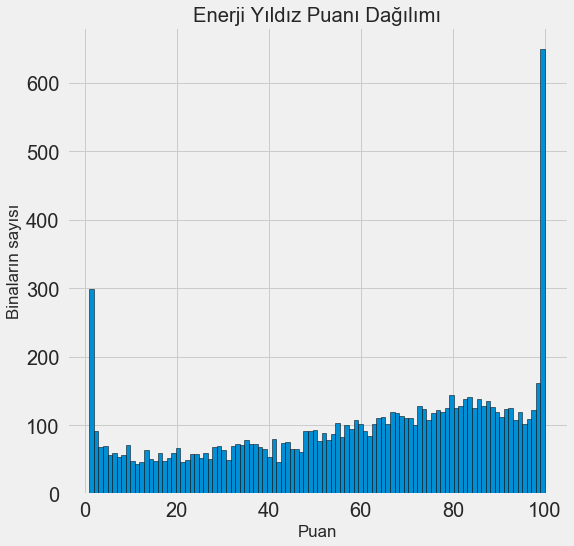

In [10]:
figsize(8,8)

#Puan(score) sütununu yeniden isimlendiriyoruz
data = data.rename(columns = {'ENERGY STAR Score':'score'})

#Enerji Star Puanının Histogramı
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Puan');
plt.ylabel('Binaların sayısı');
plt.title('Enerji Yıldız Puanı Dağılımı')

İlk histogramımızda, bazı şaşırtıcı (ve şüpheli) bilgileri ortaya çıkardı! Enerji Yıldızı Puanı bir yüzdelik derecesi olduğundan, her bir puan dağılımın %1'ini (yaklaşık 90 bina) oluşturan tamamen düz bir dağılım görmesini beklerdik. Bununla birlikte, bu en yaygın iki puanın (1 ve 100), genel puanların büyük bir kısmını oluşturduğunu görebildiğimiz için kesinlikle bu durum geçerli değildir.

Puanın tanımına geri dönersek, bu sonucun kendinden bildirilen yani bina yönetimleri tarafından bildirilen enerji kullanımına dayalı olduğunu görürüz, yani kimse bizim binamız fazla enerji tüketiyor demez, tabi objektif olanlar hariç. Bu durum bir problem oluşturuyor çünkü bir bina sahibi, binalarının performansını yapay olarak artırmak için daha düşük elektrik kullanımını rapor etmek daha cazip gelebilir. Örneğin okulda öğrencilere, yapılan bir test için puanları kendi kendilerine vermek gibidir. Bu davranış, binaların yüksek yüzdesini mükemmel bir 100 puanla açıklayacaktır, ancak neden bu kadar çok binanın en altta olduğunu bu durum açıklamıyor!

Enerji Yıldız Puanı'nı karşılaştırmak için, binanın toplam enerji kullanımından meydana gelen Enerji Kullanım Yoğunluğuna (EUI(Energy User Intensity-EKY) bakabiliriz. Burada enerji kullanımı kendiliğinden bildirilmemiştir, bu yüzden bir binanın enerji verimliliğinin daha objektif bir ölçüsü olabilir. Dahası, bu yüzdelik bir oran değildir, bu sebeple mutlak değerler önemlidir ve bunların normalde düşük ya da yüksek uçta bir kaç aykırı durum ile dağılmasını beklerdik.

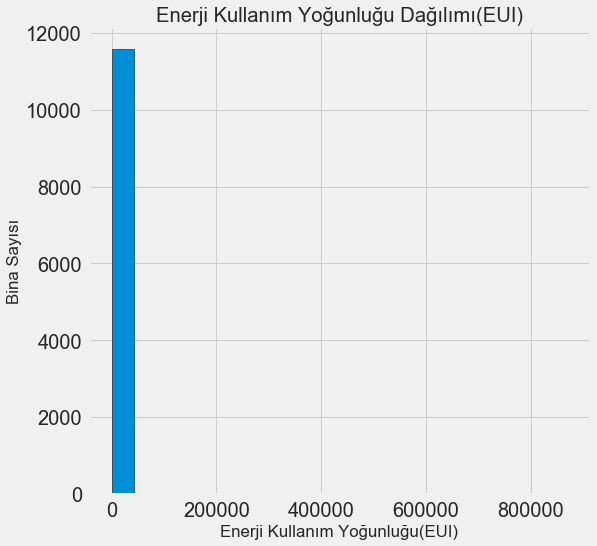

In [19]:
#Enerji Kullanım Yoğunluğunu(EUI) Histogramını çizdiriyoruz
figsize(8, 8)

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Enerji Kullanım Yoğunluğu(EUI)');
plt.ylabel('Bina Sayısı');
plt.title('Enerji Kullanım Yoğunluğu Dağılımı(EUI)');

Peki bu bize başka bir problemimiz olduğunu gösteriyor: nedir bu diye düşünürken,aykırı durumlar olduğu aklımıza geliyor! Grafik, çok yüksek puanlara sahip birkaç binanın varlığı nedeniyle inanılmaz derecede çarpık. Aykırı olan durumlarla başa çıkmak için birşeyler yapmamız gerekecek gibi görünüyor. Bu durum için istatistiklere bakalım.

In [11]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [12]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10) #son 10 değer

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

Görüldüğü üzere biri diğerlerinin açık ara önünde bir puana sahip. Mesela en son değer çok aykırı değil mi ?

In [13]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


Bu bina sahibini kontrol etmek gerekebilir :-)! Şimdi bu bilginin nasıl ele alınacağını bulmamız gerekiyor. Aykırı değerler birçok nedenden ötürü olabilir: yazım hataları, ölçüm cihazlarındaki arızalar, yanlış birimler vs. Belkide bu değerler doğru ama gerçek değerlere çok yakın değil, yani istisnai durumlar olabilir ama bizim için şu an bu değerler çok normal değil.

#### Aykırı Değerleri Çıkarıyoruz
Aykırı değerleri ortadan kaldırdığımızda, sadece garip görünmeleri nedeniyle ölçümleri atmadığımıza dikkat etmek istiyoruz. Onlar daha fazla araştırmamız gereken gerçek bir değerin sonucu olabilirler. Aykırı değerleri ortadan kaldırırken, aşırı bir dışsallık tanımını kullanarak olabildiğince dikkatli olmaya çalışıyoruz.

Düşük uçta, aşırı bir aykırı değer $\text {First Quartile} -3 * \text {Interquartile Range} $ 'ın altında.
Yüksek uçta, aşırı bir aykırı değer $\text {Third Quartile} + 3 * \text {Interquartile Range} $ 'in üzerindedir.
Bu durumda, sadece tek bir çıkış noktasını kaldıracağım ve dağılımın nasıl göründüğüne bakacağım.

In [14]:
#1. ve 3. Çeyrek değerlerini hesaplıyoruz
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

#İki Çeyrek arasındaki farkı buluyoruz
iqr = third_quartile - first_quartile

#Aykırı değerleri siliyoruz
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & 
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

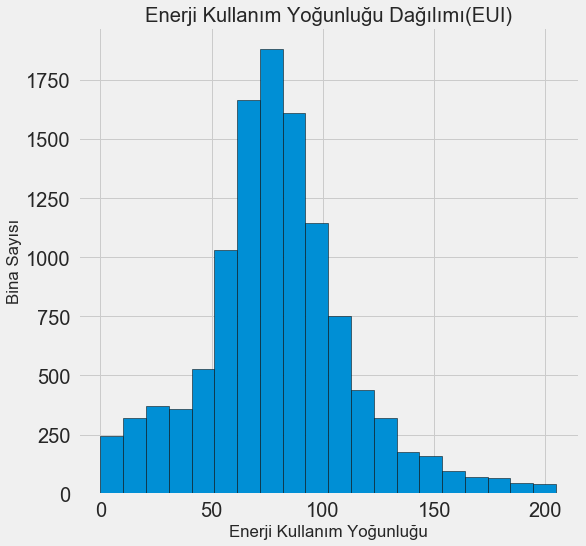

In [15]:
#Aykırı değerleri çıkardıktan sonra Enerji Kullanım Yoğunluğu(EKY-EUI) histogramını tekrar çizdiriyoruz
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Enerji Kullanım Yoğunluğu');
plt.ylabel('Bina Sayısı');
plt.title('Enerji Kullanım Yoğunluğu Dağılımı(EUI)');

Aykırı değerleri çıkardıktan sonra, artık analize geri dönebiliriz.

Bu histogram biraz daha az şüpheli görünüyor ve sağ taraftaki uzun bir kuyrukla normal dağılıma daha yakın(pozitif bir eğriliğe sahip).

Bu daha objektif bir ölçüm olsa da, hedefimiz hala Enerji Yıldız Puanını tahmin etmektir, bu yüzden bu değişkeni incelemeye geri döneceğiz. Puan iyibir ölçü olmasa bile, bunu tahmin etmek bizim bu çalışmadaki görevimizdir, bu yüzden görevimizi  yapmaya çalışacağız! Dahası, bu projede daha fazla zamanımız olsaydı, ortak bir şeyleri olup olmadığını görmek için 1 ve 100 puanlık binalara bir göz atmak ilginç olabilirdi(Siz deneyebilirsiniz).

### Değişkenler Arasındaki ilişkileri kontrol ediyoruz.
Kategorik değişkenlerin puan üzerindeki etkisine bakmak için kategorik değişkenin değeri ile renklendirilmiş bir yoğunluk grafiği çizdirebiliriz. Yoğunluk grafikleri ayrıca tek bir değişkenin dağılımını gösterir ve düzeltilmiş histogram olarak düşünülebilir. Yoğunluk eğrilerini kategorik bir değişkenle renklendirirsek, bu bize dağılımın sınıfa göre nasıl değiştiğini gösterir.

Yapacağımız ilk grafiksel çizim, puanların bina türüne göre dağılımını gösterecektir. Çizgiyi dağıtmamak için, grafiği veri kümesinde 100'den fazla gözlem(bina) içeren yapı türleriyle sınırlayacağız.

In [16]:
# Bina(gözlem) sayısı 100 ve üzeri olan bir gözlem listesi oluşturuyoruz
types = data.dropna(subset = ['score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 100].index)

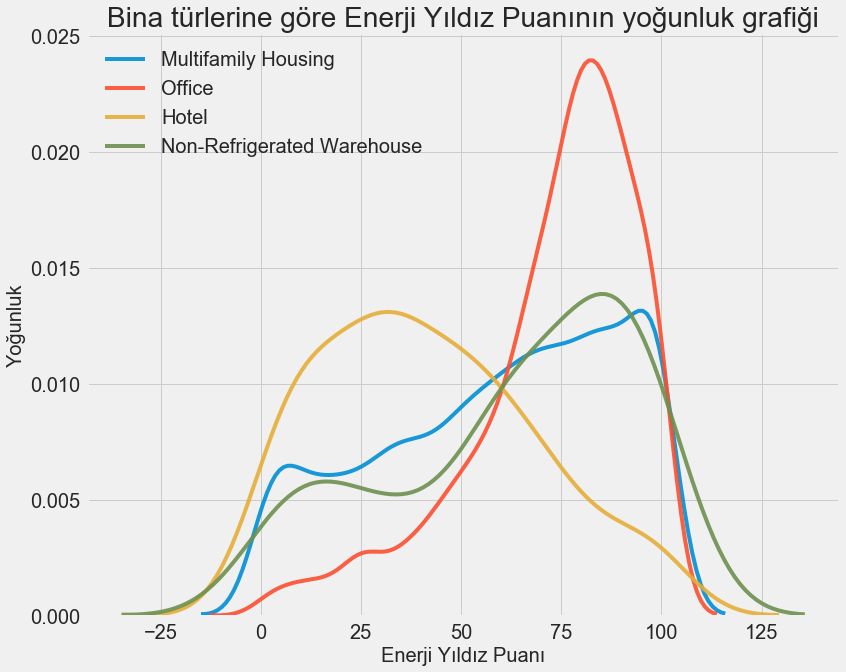

In [19]:
#Bina kategorilerine göre dağılım puanlarını çizdiriyoruz
figsize(12, 10)

#Herbir bina türü için çizdiriyoruz
for b_type in types:
    #Bina türünü seçiyoruz
    subset = data[data['Primary Property Type - Self Selected'] == b_type]
    
    #Enerji Yıldız puanı için yoğunluk çizimi
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.9);
#Çizimimizi etiketlendiriyoruz
plt.xlabel('Enerji Yıldız Puanı', size = 20); 
plt.ylabel('Yoğunluk', size = 20);
plt.title('Bina türlerine göre Enerji Yıldız Puanının yoğunluk grafiği', size  = 28);

Bu grafikten, bina tipinin puan üzerinde bir etkisi olduğunu görebiliriz(grafik üzerindeki negatif puanlar, çekirdek yoğunluğu tahmininin bir sonucudur). İlk başta puanı tahmin etmek için sayısal sütunlara odaklanacağız, o halde, bu grafik bize özellik türünü eklememizi söyler çünkü bu bilgi puanı belirlemek için yararlı olabilir. Yapı türü kategorik bir değişken olduğundan, bir makine öğrenim modeline dahil edilmeden önce tek kodlu(one-hot encoding) kodlanmış olmalıdır.

Başka bir kategorik değişkeni incelemek için, aynı grafiği yapabiliriz, ancak bu kez grafik başka bir şekilde renklendirilmesi gerekir.

In [20]:
#Sayısı 100 gözlemden(bina) fazla olan ilçelerin bir listesini oluşturuyoruz
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

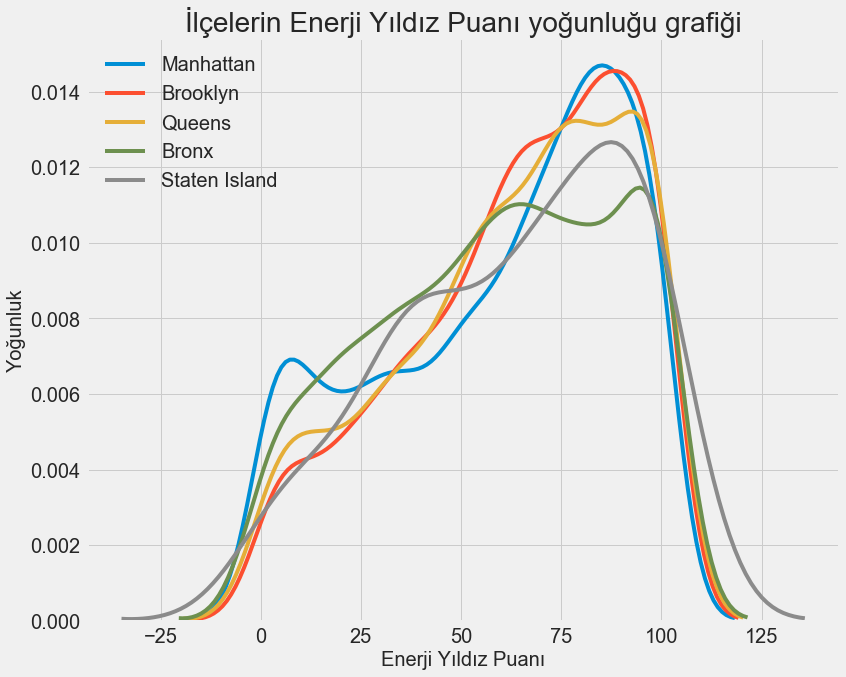

In [21]:
#İlçelere göre puan dağılımını çizdiriyoruz
figsize(12, 10)

#Herbir ilçe için dağılım puanını çizdiriyoruz
for borough in boroughs:
    #Bina türünü seçiyoruz
    subset = data[data['Borough'] == borough]
    
    #Enerji Yıldız Puanı yoğunluğu çizimi
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
#Çizimlerimizi etiketlendiriyoruz
plt.xlabel('Enerji Yıldız Puanı', size = 20);
plt.ylabel('Yoğunluk', size = 20);
plt.title('İlçelerin Enerji Yıldız Puanı yoğunluğu grafiği', size = 28);

İlçe binası, bina türü kadar, puan dağılımında da önemli bir fark yaratmıyor gibi görünmektedir. Bununla birlikte, ilçeyi kategorik bir değişken olarak dahil etmek mantıklı olabilir.

### Özellikler(Features) ve Hedef (Target) Arasındaki Korelasyonlar
Özellikler (değişkenler) ile hedef arasındaki korelasyonları ölçmek için Pearson korelasyon katsayısını hesaplayabiliriz. Bu, iki değişken arasındaki doğrusal bir ilişkinin gücü ve yönünün bir ölçüsüdür: -1 değeri, iki değişkenin, mükemmel negatif olarak doğrusal korelasyonu olduğu ve bir +1 değerinin, iki değişkenin, mükemmel pozitif olarak doğrusal ilişkili olduğu anlamına gelir. Aşağıdaki şekil, korelasyon katsayısının farklı değerlerini ve grafiksel olarak nasıl göründüğünü göstermektedir.

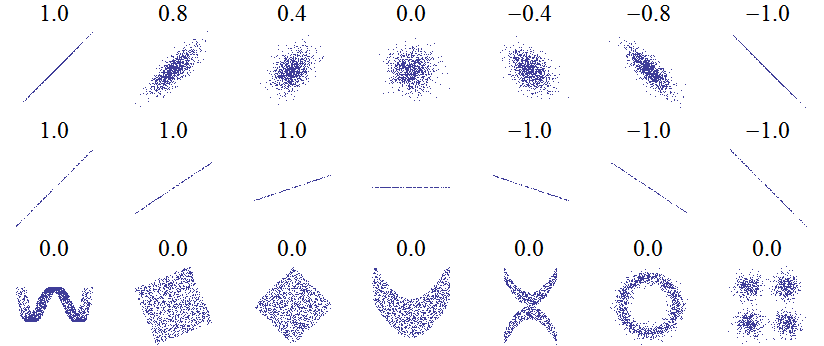

Özellikler ve hedefler arasında doğrusal olmayan ilişkiler olsa da ve korelasyon katsayıları özellikler arasındaki etkileşimleri hesaba katmasa da, doğrusal ilişkiler verilerdeki eğilimleri keşfetmeye başlamak için iyi bir yoldur. Daha sonra modelimizde kallanacağımız özellikleri seçmek için bu değerleri kullanabiliriz.

Aşağıdaki kod, tüm değişkenler ve puan arasındaki korelasyon katsayılarını hesaplar.

In [22]:
# Tüm korelasyonları bulup sıralıyoruz
correlations_data = data.corr()['score'].sort_values()

# Negatif korelasyonu en yüksek olan
print(correlations_data.head(15),'\n')

# Pozitif Korelasyonu en yüksek olan
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

Özellikler ve hedef arasında birkaç güçlü negatif korelasyon vardır. Puanla en olumsuz korelasyonlar, Enerji Kullanım Yoğunluğu'nun (EUI), Site EUI'sinin (kBtu/ft²) ve Hava Normalleştirilmiş Yerleşkenin EUI'sının (kBtu/ft²) farklı kategorileridir (bunlar, nasıl hesaplandıklarına göre biraz değişir). EKY, binaların kare görüntüleri ile bölünen bir binanın kullandığı enerji miktarıdır ve daha düşük bir puanın daha iyi olduğu bir binanın verimliliğinin bir ölçüsüdür. Sezgisel olarak, bu korelasyonlar daha mantıklı: EKY arttıkça, Enerji Yıldızı Puanı düşme eğilimindedir, yani devlet tasarrufa teşvik ediyor, az enerji kullan puanın artsın diyor.

Olası doğrusal olmayan ilişkileri hesaba katmak için, özelliklerin karekökünü ve doğal log dönüşümlerini alabilir ve daha sonra puan ile korelasyon katsayılarını hesaplayabiliriz. İlçe veya bina türü arasındaki olası ilişkileri denemek ve yakalamak için (bunların kategorik değişkenler olduğunu unutmayın) bu sütunları one-hot kodlamak zorunda kalacağız.

Aşağıdaki kod, sayısal değişkenlerin log ve karekök dönüşümlerini, seçilen iki kategorik değişkeni (bina türü ve ilçe) one-hot olarak kodlamaktadır, tüm özellikler ve puan arasındaki korelasyonları hesaplayıp ve en yüksek 15 olumlu korelasyon ile en iyi 15 negatif korelasyon sonuçlarını görüntülüyoruz. Bu işlemleri pandas ile yapmak göreceğiniz üzere kolay!

In [23]:
#Sayısal değer içeren sütunları seçiyoruz
numeric_subset = data.select_dtypes('number')

#Sayısal sütunlardan karekök ve logaritmayı birlikle oluşturacak bir sütun oluşturuyoruz
for col in numeric_subset.columns:
    #Enerji Yıldız Puanı sütununu yoksayıyoruz, çünkü zaten değerler sayısal
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
#Şimdi de kategorik veri içeren sütunları seçiyoruz
categorical_subset = data[['Borough', 'Primary Property Type - Self Selected']]

#One hot kodlama
categorical_subset = pd.get_dummies(categorical_subset)

#concat kullanarak iki dataframe'i birleştiriyoruz, sütunları birlşetirmek için axis = 1 yapıyoruz
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

#Enerji Yıldız puanı olmayan binaları veri setinden çıkarıyoruz
features = features.dropna(subset =['score'])

#Şimdi Özellikler arasındaki korelasyona bakalım
correlation = features.corr()['score'].dropna().sort_values()

/Users/saitalay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/saitalay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/saitalay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [24]:
#Puan ile Korelasyonu en olumsuz olan 15 özelliği görüntülüyoruz
correlation.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [25]:
# Puan ile Korelasyonu en iyi olan 15 özelliği görüntülüyoruz
correlation.tail(15)

sqrt_Order                                                                     0.028662
Primary Property Type - Self Selected_Supermarket/Grocery Store                0.029067
Borough_Queens                                                                 0.029545
Primary Property Type - Self Selected_Residence Hall/Dormitory                 0.035407
Order                                                                          0.036827
Primary Property Type - Self Selected_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                               0.050486
log_Community Board                                                            0.055495
Community Board                                                                0.056612
sqrt_Community Board                                                           0.058029
sqrt_Council District                                                          0.060623
log_Council District            

Özellikleri dönüştürdükten sonra, en güçlü ilişkiler hala Enerji Kullanımı Yoğunluğu (EUI) ile ilgili olanlardır. Log ve karekök dönüşümleri, herhangi bir güçlü ilişki ile sonuçlanmış gibi görünmüyor. Bina tipi bir ofisin (En Büyük Mülkiyet Kullanım-, Ofis Türü) puanla biraz pozitif ilişkili olduğunu görmemize rağmen güçlü olumlu doğrusal ilişkiler yoktur. Bu değişken, bina türü için kategorik değişkenlerin one-hot kodlanmış bir temsilidir.

Bu seçimi, özellik seçimi yapmak için kullanabiliriz (birazdan geliyor). Şu anda, Site EUI (kBtu / ft ^ 2) olan veri kümesindeki en önemli korelasyonu (mutlak değer açısından) çizelim. Grafiği, ilişkiyi nasıl etkilediğini göstermek için bina türüne göre renklendirebiliriz.

### İki Değişkenli Çizimler
İki değişken arasındaki ilişkiyi görselleştirmek için bir dağılım grafiği kullanırız. İşaretleyicilerin rengi veya işaretleyicilerin boyutu gibi özellikleri kullanarak ek değişkenler de ekleyebiliriz. Burada iki sayısal değişkeni birbiriyle karşılaştırıp ve üçüncü kategorik bir değişkeni temsil etmek için renk kullanıyoruz.

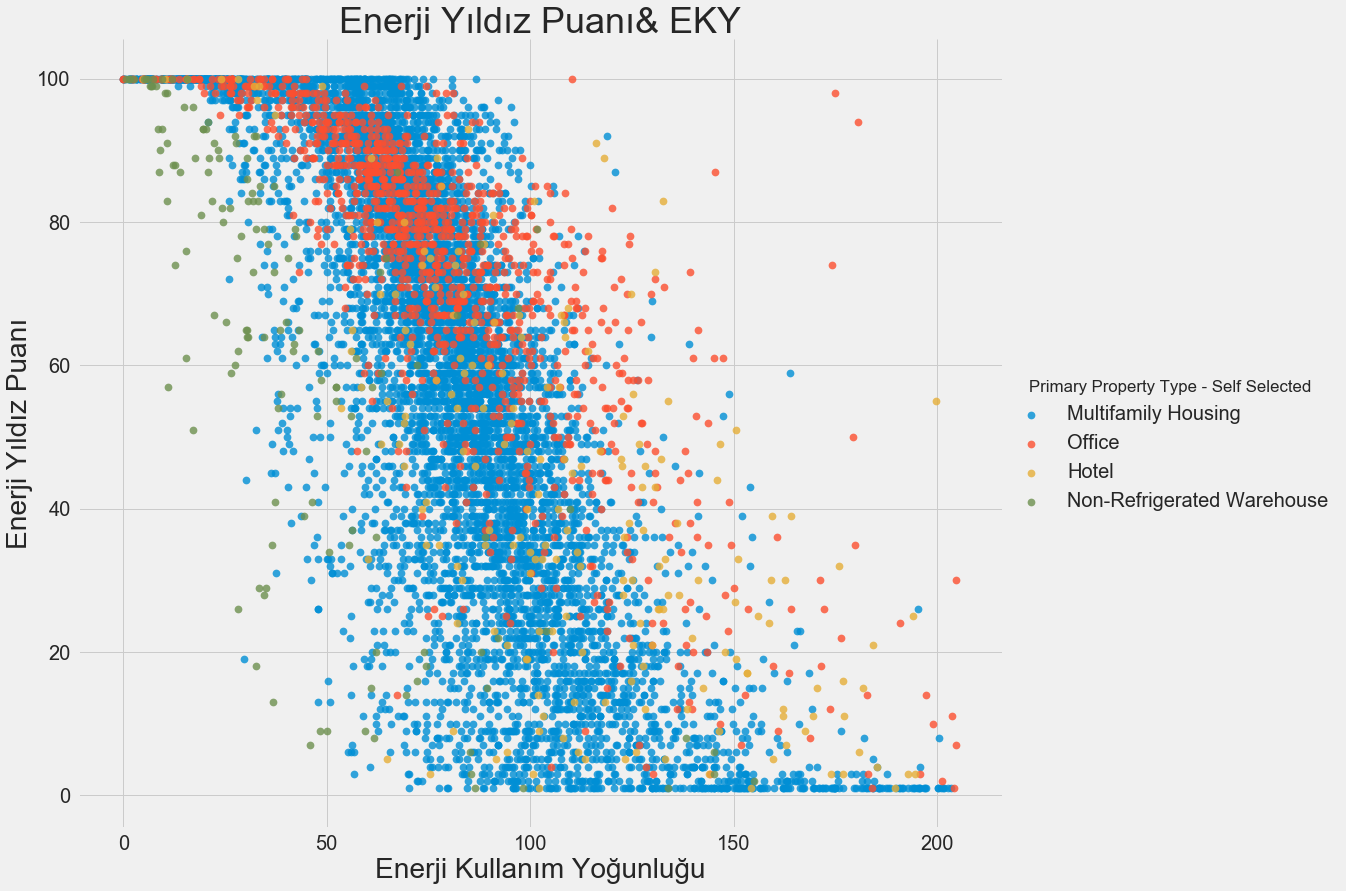

In [26]:
figsize(12, 10)

#Bina Türlerini Ayıklıyoruz
features['Primary Property Type - Self Selected'] = data.dropna(subset = ['score'])['Primary Property Type - Self Selected']

#100 ve daha üzeri gözlem yapılmış bina türleri ile sınırlıyoruz
features = features[features['Primary Property Type - Self Selected'].isin(types)]

#Seaborn kütüphanesini kullanarak Puan ve Log değerlerinin saçılım grafiğini çizdiriyoruz
sns.lmplot('Site EUI (kBtu/ft²)', 'score',
          hue = 'Primary Property Type - Self Selected', data = features,
          scatter_kws = {'alpha' : 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);
#Son Olarak Şekillerimizi etiketlendirelim
plt.xlabel('Enerji Kullanım Yoğunluğu', size = 28)
plt.ylabel('Enerji Yıldız Puanı', size = 28)
plt.title('Enerji Yıldız Puanı& EKY', size = 36);
           

EKY ile puan arasında açık bir negatif ilişki vardır. İlişki mükemmel doğrusal değildir. (ancak bu özellik bir binanın puanını tahmin etmek için önemli gibi görünmektedir).

### Çiftli Çizim(Pairs Plot)
Keşifsel veri analizi için son bir alıştırma olarak, birkaç farklı değişken arasında çiftler çizebiliriz. Çiftler Çizgisi(Pairs Plot), değişkenlerin çiftleri ve diyagonaldeki tek değişkenli histogramlar arasındaki dağılımları gösterdiği için birçok değişkeni aynı anda incelemenin harika bir yoludur.

Seaborn PairGrid fonksiyonunu kullanarak, farklı çizimleri gridin üç yönüne göre haritalayabiliriz. Üst üçgenin dağılma noktaları olacak, diyagonal histogramları gösterecek ve alt üçgen iki değişken arasındaki korelasyon katsayısını ve iki değişkenin 2-D çekirdek yoğunluk tahminini gösterecektir.

/Users/saitalay/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


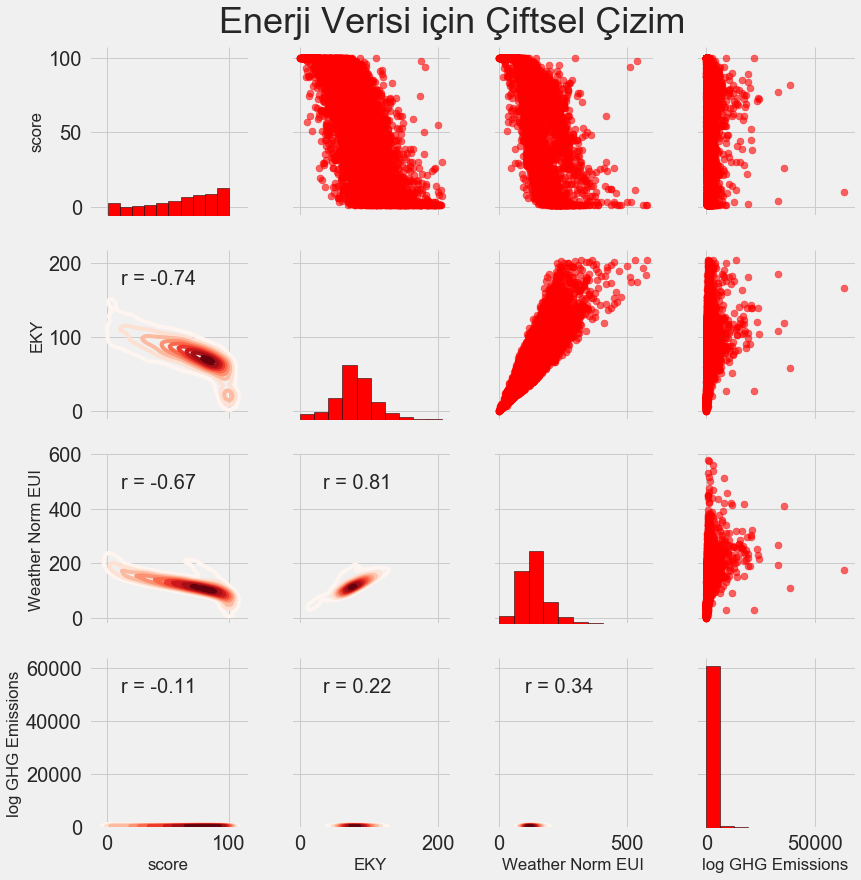

In [27]:
# Sütunları çizdirmek için ayıklıyoruz
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'Total GHG Emissions (Metric Tons CO2e)']]

#  inf değerlerini nan ile değiştiriyoruz
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Sütunları yeniden isimlendiriyoruz
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'EKY', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# na Değerlerini verisetinden çıkarıyoruz
plot_data = plot_data.dropna()

# İki sütun arasındaki korelasyon katsayısını hesaplayacak fonksiyonu yazıyoruz
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# pairgrid nesnesi oluşturuyoruz
grid = sns.PairGrid(data = plot_data, size = 3)

# Üst saçılım grafiği
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Çapraz histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

#  Altta, korelasyon  ve yoğunluk çizimi
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Tüm çizim için başlığımız
plt.suptitle('Enerji Verisi için Çiftsel Çizim', size = 36, y = 1.02);

Çizelgedeki ilişkileri yorumlamak için, bir satırdaki değişkenlerin bir sütundaki değişkenlerle kesiştiği yerleri arayabiliriz. Örneğin, puan ile GHG Emisyonları günlüğü arasındaki ilişkiyi bulmak için puan sütununa bakar ve log GHG Emissions satırını buluruz. Kesişim noktasında (alt sol çizim), puanın bu değişkenle -0.11 korelasyon katsayısına sahip olduğunu görürüz. Sağ üst grafiğe bakarsak, bu ilişkinin bir dağılım grafiğini görebiliriz.

### Özellik Mühendisliği ve Seçimi
Artık verilerdeki eğilimleri ve ilişkileri araştırdık, modellerimiz için bir dizi özellik mühendisliği üzerinde çalışabiliriz. Bu özellik mühendisliği için EDA'nın sonuçlarını kullanabiliriz. Özellikle, mühendislik / seçim özelliklerinde bize yardımcı olabilecek EDA'dan aşağıdakileri öğrendik:

 - Puan dağılımı bina tipine ve ilçeye göre de değişmektedir. Sayısal özelliklere odaklanmamıza rağmen, bu iki kategorik özelliği de modele dahil etmeliyiz.
 - Özelliklerin log dönüşümünün alınması, özellikler ve skor arasındaki doğrusal korelasyonlarda önemli artışlara yol açmaz.
 
Daha fazla ilerlemeden önce, özellik mühendisliği ve seçimin ne olduğunu tanımlamalıyız! Bu tanımlamalar gayri resmi ve büyük ölçüde çakışıyor, ancak bunları iki ayrı süreç olarak düşünebiliriz:

  - Özellik Mühendisliği: Ham veri alma ve bir makine öğrenme modelinin bu özellikleri ve hedefi belirleyen bir haritalamayı öğrenmesini sağlayan yeni özellikler çıkarma veya oluşturma süreci. Bu, log ve karekök ile yaptığımız gibi değişkenlerin dönüşümlerini almak veya bir modelde kullanılabilmeleri için tek-kodlayıcı(one-hot encoding) kategorik değişkenleri ifade etmek anlamına gelebilir. Genel olarak, özellik mühendisliğini ham verilerden türetilen ek özellikler diye tanımlayabiliriz. 
  - Özellik Seçimi: Verilerinizdeki en uygun özellikleri seçme işlemidir. "En alakalı" birçok faktöre bağlı olabilir, ancak hedefle en yüksek korelasyon kadar basit veya en fazla varyansa sahip özellikler olabilir. Özellik seçiminde, modelimizin özellikler ve hedef arasındaki ilişkiyi öğrenmesine yardımcı olmayan özellikleri çıkarırız. Bu, modelin yeni verilere daha iyi genelleştirilmesine ve daha yorumlanabilir bir modelle sonuçlanmasına yardımcı olabilir. Genel olarak, özellik seçimini çıkarma özellikleri olarak düşünebiliriz, çünkü özellik seçimi sonunda sadece en önemli olanlar elimizde kalır.

Özellik mühendisliği ve seçimi, genellikle doğru bir şekilde yapılması gereken birkaç girişime ihtiyaç duyan iteratif süreçlerdir. Çoğu zaman, rastgele bir ormandaki(random forest) özellik itirazları gibi modelleme sonuçlarını geri dönüp, özellik seçimini tekrar yapmak için kullanırız veya daha sonra yeni değişkenler oluşturmayı gerektiren ilişkileri keşfedebiliriz. Ayrıca, bu süreçler genellikle verilerin bir alan bilgisi ve istatistik nitelikleri karışımını içerir.

Özellik mühendisliği ve seçimi genellikle bir makine öğrenim problemine ayrılan zamanın en yüksek getirilerine sahiptir. Doğru olması biraz zaman alabilir, ancak genellikle model için kullanılan tam algoritma ve hipermetrelerden daha önemlidir. Eğer modeli doğru verilerle beslemezsek, o zaman başarısızlığa ayarlıyoruz demektir ve modelin iyi şeyler öğrenmesini de beklememeliyiz!

Bu projede, özellik mühendisliği için aşağıdaki adımları uygulayacağız:

  - Sadece sayısal değişkenleri ve iki kategorik değişkeni (ilçe ve bina türü) seçiyoruz
  - Sayısal değişkenlerin log dönüşümünü ekliyoruz
  - Kategorik değişkenleri one-hot olarak kodluyoruz
 
 
Özellik seçimi için ise aşağıdaki işlemi yapacağız,

   - Eşleme(collinearity) özelliklerini kaldırıyoruz.
   
Biz bu sürece vardığımızda collinearity (multiicollinearity olarak da adlandırılır) tartışacağız!

Aşağıdaki kod, sayısal özellikleri seçer, tüm sayısal özelliklerin log dönüşümlerine ekler, kategorik özellikleri one-hot kodlar ve birlikte özellikler kümesine katılır.

In [28]:
#Orjinnal verilerin bir kopyasını alıyoruz
features = data.copy()

#Sayısal sütunları seçiyoruz
numeric_subset = data.select_dtypes('number')

#Sayısal sütunları logaritmik olarak dönüştürüyoruz
for col in numeric_subset.columns:
    #Puanı sütununu daha öncede yaptığımız gibi döngüye dahil etmiyoruz
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
#Kategorik sütunları seçiyoruz
categorical_subset = data[['Borough', 'Primary Property Type - Self Selected' ]]

#one-hot kodlama
categorical_subset = pd.get_dummies(categorical_subset)

#concatanete(birleştirme) komutunu kullanarak iki veri çerçevesini birleştireceğiz
#axis = 1 seçiyoruz çünkü sütunlar üzerinde işlem yapıyoruz
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

/Users/saitalay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/saitalay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


Bu noktada 109 farklı özellikte 11319 gözlem (bina) var. Bu özelliklerin hepsinin puanı tahmin etmek için önemli olma ihtimali yoktur ve bu özelliklerin birçoğu da yüksek oranda korundukları için gereksizdir. Aşağıda bu ikinci konuyla ilgileneceğiz.

### Eşdoğrusal(Collinear) Özellikleri Kaldırma
Yüksek collinear özelliklerin aralarında anlamlı bir korelasyon katsayısı vardır. Örneğin, veri kümemizde, Site EUI ve Hava Normları EUI, enerji kullanımı yoğunluğunun hesaplanmasından sadece biraz farklı olduğu için yüksek derecede ilişkilidirler.

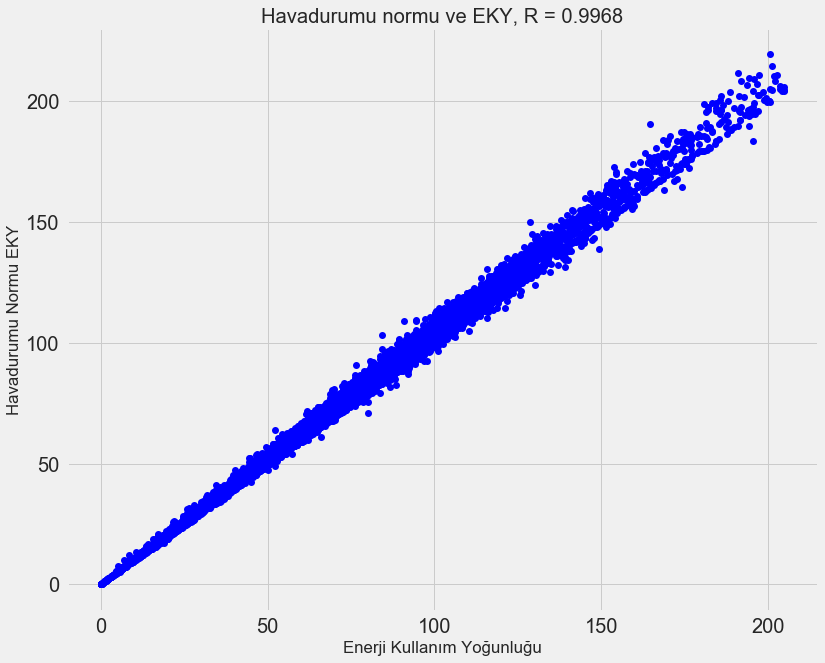

In [29]:
 plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Enerji Kullanım Yoğunluğu'); plt.ylabel('Havadurumu Normu EKY')
plt.title('Havadurumu normu ve EKY, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

Bir veri kümesindeki değişkenler genellikle küçük bir dereceyle ilişkili olsa da, modele gerekli bilgileri vermek için sadece özelliklerden birini korumamız gerektiği anlamında yüksek oranda çapraz değişkenler gereksiz olabilir.

Kolinear(eşdoğrusal) özelliklerin kaldırılması, özelliklerin sayısını azaltarak model karmaşıklığını azaltmanın ve model genellemesini artırmaya yardımcı olan bir yöntemdir. Aynı zamanda modeli yorumlamamıza da yardımcı olabilir, çünkü hem EKY hem de hava durumu normalleştirilmiş EKY'nun puanı nasıl etkilediğinden ziyade, EKY gibi tek bir değişken hakkında endişelenmemiz gerekir.

Varyans Enflasyon Faktörünün kullanılması gibi collinear(eşdoğrusal) özelliklerin kaldırılması için çeşitli yöntemler vardır. Daha basit bir metrik kullanacağız ve birbiriyle belirli bir eşiğin üzerinde bir korelasyon katsayısına sahip olan özellikleri kaldıracağız (puanla değil, puanla yüksek oranda korelasyon gösteren değişkenler istiyoruz!) Kolinear değişkenleri kaldırma hakkında daha kapsamlı bir tartışma için, [Kaggle'da bu yazıyı kontrol edebilirsiniz.](https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/code)

Aşağıdaki kod, karşılaştırılan iki özellikten birini kaldırarak korelasyon katsayıları için seçtiğimiz bir eşiğe dayalı olarak collinear özellikleri kaldırır. Ayrıca, eşiği ayarlamanın etkisini görebilmemiz için çıkardığı korelasyonları da yazdırır. Özelliklerin arasındaki korelasyon katsayısı bu değeri aşarsa, bir çift özellikten birini kaldıran 0,6 eşiğini kullanırız.

Yine, bu kodu bir [https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383] dan uyarladım.

In [30]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [31]:
#Belirli bir korelasyon katsayısının üzerindeki collinear özelliklerini kaldırıyoruz
features = remove_collinear_features(features, 0.6);

In [32]:
#na içeren tüm sütunları siliyoruz
features = features.dropna(axis = 1, how = 'all')
features.shape

(11319, 67)

Son veri kümemiz şimdi 66 özelliğe sahiptir (sütunlardan biri hedeftir). Bu hala oldukça azdır, ancak çoğunlukla, bir kategorik değişkenleri kodlayan one-hot kodlama vardır. Ayrıca, doğrusal regresyon gibi modeller için çok sayıda özellik sorunlu olsa da, rasgele orman gibi modeller örtük özellik seçimi gerçekleştirmekte ve otomatik olarak hangi özelliklerin eğitim sırasında önemli olduğunu belirlemektedir. Diğer özellik seçimi adımları vardır, ancak şimdilik sahip olduğumuz tüm özellikleri koruyacak ve modelin nasıl performans gösterdiğini göreceğiz.

### Ek Özellik Seçimi
Özellik seçimi için daha fazla yöntem var. Bazı popüler yöntemler, özellikleri en büyük varyansı koruyan daha az sayıda boyuta ya da bir takım özelliklerdeki bağımsız kaynakları bulmayı amaçlayan bağımsız bileşenler analizine (ICA) dönüştüren temel bileşenler analizini (PCA-Principal Component Analysis) içerir. Bununla birlikte, bu yöntemler özelliklerin sayısını azaltmada etkili olsa da, fiziksel bir anlamı olmayan ve dolayısıyla bir modeli yorumlamayı neredeyse imkansız kılan yeni özellikler yaratırlar.

Bu yöntemler, yüksek boyutlu verilerle uğraşmak için çok faydalıdır ve makine öğrenimi problemleriyle uğraşmayı planlıyorsanız, konu hakkında daha fazla bilgi edinmeniz gerekecektir!

1-[link1->](http://scikit-learn.org/stable/modules/feature_selection.html)
2-[link2 ->](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)
3-[link3 ->](http://cs229.stanford.edu/notes/cs229-notes11.pdf)


## Veri Setimizi Eğitim ve Test Setlerine Bölme işlemi 
Makine öğrenmesinde, özelliklerimizi her zaman Eğitim ve Test olarak iki gruba ayırmamız gerekir;

  Eğitim sırasında modelimize verdiğimiz eğitim setinin yanı sıra, cevaplar ve hedefler arasında bir eşleme yapabilmeyi öğrenebilmekteyiz.
  Model tarafından öğrenilen haritalamayı değerlendirmek için ise test setindeki verileri kullarınız. Model test setindeki cevapları hiç görmemiş, bunun yerine yalnızca özellikleri kullanarak tahminlerde bulunmalıdır. Test setinin gerçek cevaplarını bildiğimiz gibi, gerçek dünyaya uyarlandığında modelimizin ne kadar iyi performans göstereceğine dair bir tahminde bulunmak için test tahminlerini gerçek test hedefleriyle karşılaştırabiliriz.
Bizim sorunumuz için öncelikle "Enerji Yıldız Puanı" olmaksızın tüm binaları çıkaracağız (bu binalar için doğru cevabı bilmeyiz, böylece eğitim veya test için yardımcı olmayacaktır). Ardından, binaları bir Enerji Yıldız Puanı ile binaların %30'unu kapsayan bir test setine ve binaların %70'ine yönelik bir eğitim setine bölebiliriz.

Verileri rastgele bir eğitim setine ayırmak ve test setini scikit-learn kullanarak test etmek oldukça basittir. Tutarlı sonuçlar sağlamak için bölünmenin rastgele durumunu da ayarlayabiliriz.

In [33]:
#Binaları Puansız ve Puanlı olarak ayıklıyoruz
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 67)
(9461, 67)


In [34]:
#Özellik ve Hedef değerlerini ayırıyoruz
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])

#Bazı değerlerin isimlerini değiştiriyoruz
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

#Evet Veri setimizi %30 Test verisi ve %70 Eğitim verisi olacak şekilde ayırıyoruz
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 66)
(2839, 66)
(6622, 1)
(2839, 1)


Bizim şu anda 1858 tane puan verilmemiş binamız var. Eğitim setinde ise 6622 bina ve test setinde 2839 bina var. Bu çalışmamızı tamamlamak için son bir adımımız var: Modellerimizi yenmek için saf bir  model oluşturna!

### Temel Bir Model Kurma
Makine öğrenimi modellerine başlamadan önce temel bir model oluşturmak önemlidir. Oluşturduğumuz modeller saf bir tahminden daha iyi performans gösteremezse, o zaman o makine öğreniminin bu sorun için uygun olmadığını itiraf etmeliyiz. Bunun nedeni doğru modelleri kullanmamanız olabilir, çünkü daha fazla veriye ihtiyacımız var, ya da makine öğrenimi gerektirmeyen daha basit bir çözüm vardır. Bir taban çizgisi oluşturmak çok önemlidir, bu yüzden biz sadece problemi çözemediğimizin farkına varmak için bir makine öğrenme modeli oluşturmaya son vermeyiz.

Bir regresyon görevi için, iyi bir temel taban çizgisi, test setindeki tüm örnekler için eğitim setindeki hedefin medyan değerini tahmin etmektir. Bu, bizim modellerimiz için nispeten düşük bir bar uygulamak ve ayarlamak için basittir: eğer medyan değeri tahmin etmekten daha iyi bir şey yapamazlarsa, o zaman yaklaşımımızı yeniden gözden geçirmemiz gerekecektir.

### Metrik: Ortalama Mutlak Hata 
Makine öğrenimi görevlerinde kullanılan birtakım metrikler vardır ve hangisinin seçileceğini bilmek zor olabilir. Çoğu zaman, belirli bir soruna bağlı olacak ve belirli bir hedefe sahip olmanız gerekiyorsa dahada zor olacaktır. Değerlendirme sürecini basitleştirdiği için, modelleri karşılaştırmak için Andrew Ng'nin tek bir gerçek değer performans ölçüsü kullanmanızı tavsiye ediyorum. Birden çok metriği hesaplamaktan ve her birinin ne kadar önemli olduğunu belirlemekten ziyade, tek bir sayı kullanmamız gerekir. Bu durumda, regresyon yaptığımız için, ortalama mutlak hata(Mean Absolute Error) uygun bir metriktir. Bu aynı zamanda yorumlanabilir çünkü hedef değerindeki aynı birimlerde tahmin edilen ortalama tutarı temsil eder.

Aşağıdaki işlev, gerçek değerler ve tahminler arasındaki ortalama mutlak hatasını hesaplar.

In [35]:
#Ortalama Mutlak Hata oranı hesaplama fonksiyonumuz
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Şimdi ortanca tahmini yapabilir ve test setinde değerlendirebiliriz.

In [36]:
baseline_guess = np.median(y)

print('Tahmin edilen temel puan : %0.2f' % baseline_guess)
print('Test verileri üzerinde modelimizin temel performansı : MAE = %0.4f' % (mae(y_test, baseline_guess)))

Tahmin edilen temel puan : 66.00
Test verileri üzerinde modelimizin temel performansı : MAE = 24.5164


Bu, test setindeki ortalama tahmimizin yaklaşık 25 puan olduğunu gösterir. Puanlar 1 ile 100 arasındadır, yani bu yaklaşık% 25 ise naif bir yöntemden ortalama hata anlamına gelir. Medyan eğitim değerini tahmin etmenin saf yöntemi, modellerimizin yenmesi için bize düşük bir temel bilgi sağlar!

 ## Bu çalışmamızın sonucu
Bu çalışmamızda, bir makine öğrenim probleminin ilk üç adımını gerçekleştirdik:

    1- Ham verileri temizleyip biçimlendirdik
    2- Bir keşifsel veri analizi gerçekleştirdik
    3- Özellik mühendisliği ve özellik seçimi ile modelimizi eğitmek için bir dizi özellik geliştirdik
    
Ayrıca, bir temel metrik oluşturmanın çok önemli bir görevini de tamamladık, böylece modelimizin tahmin etmekten daha iyi olup olmadığını belirleyebiliriz!

Umarım, işlem basamaklarının her bir parçasının bir sonraki aşamaya nasıl aktığına dair bir fikir edinmeye başlıyorsunuz: verileri temizlemek ve doğru formatta almak, keşifsel veri analizini gerçekleştirmemize olanak sağlıyor. EDA daha sonra özellik mühendisliği ve seçim aşamasında kararlarımızı etkiler. Bu üç aşama genellikle bu sırayla gerçekleştirilir, ancak daha sonra tekrar  bu adımlara gelebilir ve modelleme sonuçlarımıza dayanarak daha fazla EDA veya özellik mühendisliği yapabiliriz. Veri bilimi, her zaman önceki çalışmamızı iyileştirmenin yollarını aradığımız yinelemeli bir süreçtir. Bu, ilk denemede mükemmel şeyler elde etmek zorunda olmadığımız anlamına gelir (elimizden gelenin en iyisini yapmaya çalışsak da) çünkü sorun hakkında daha fazla bilgiye sahip olduktan hemen sonra kararlarımızı tekrar gözden geçirme fırsatı vardır.

İkinci bölümde, birkaç makine öğrenim yönteminin uygulanmasına, en iyi modelin seçilmesine ve çapraz doğrulama ile hiperparametre ayarlaması kullanılarak sorunumuz için optimize edilmeye odaklanacağız. Son bir adım olarak, geliştirdiğimiz veri kümelerini bir sonraki bölümde tekrar kullanacağız.